In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
import numpy as np

#created in create_embeddings
X_test = pd.read_csv('../Machine_Learning/X_test.csv')
y_test = pd.read_csv('../Machine_Learning/y_test.csv')
X_train = pd.read_csv('../Machine_Learning/X_train.csv')
y_train = pd.read_csv('../Machine_Learning/y_train.csv')

In [9]:
# Count the occurrences of each value
value_counts = y_train.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_train)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_train that are 1: {num_ones}")
print(f"Percentage of entries in y_train that are 1: {percent_ones:.2f}%")

Number of entries in y_train that are 1: 96
Percentage of entries in y_train that are 1: 10.67%


In [10]:
# Count the occurrences of each value
value_counts = y_test.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_test)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_test that are 1: {num_ones}")
print(f"Percentage of entries in y_test that are 1: {percent_ones:.2f}%")

Number of entries in y_test that are 1: 29
Percentage of entries in y_test that are 1: 12.89%


In [6]:
# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    #"Support Vector Machine": SVC(kernel='linear'),  # Use linear kernel to get feature weights
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}


# Dictionary to store cross-validation scores, test scores, and feature importances
results = {}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')
    # Perform 10-fold cross-validation on the training set
    cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
    print(cv_scores)
    
    # Fit the model on the training set
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Evaluate on test set
    test_score = accuracy_score(y_test, y_pred)
    
    feature_importances = None
    
    # Get feature importances or coefficients
    if hasattr(clf, 'feature_importances_'):
        feature_importances = clf.feature_importances_
        print("added weights")
    elif hasattr(clf, 'coef_'):
        feature_importances = clf.coef_[0]
        print("added weights")
    else:
        print("no weights")
    
    # Store results
    results[name] = {
        "Cross-Validation Scores": cv_scores,
        "Mean CV Score": np.mean(cv_scores),
        "CV Score Std Dev": np.std(cv_scores),
        "Test Score": test_score,
        "Feature Importances": feature_importances
    }

# Print results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"  Cross-Validation Scores: {result['Cross-Validation Scores']}")
    print(f"  Mean CV Score: {result['Mean CV Score']}")
    print(f"  CV Score Std Dev: {result['CV Score Std Dev']}")
    print(f"  Test Score: {result['Test Score']}")
    if result['Feature Importances'] is not None:
        print(f"  Feature Importances: {result['Feature Importances']}")
    print("\n")


Random Forest


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionW

[0.97777778 0.98888889 1.         0.95555556 0.98888889 0.98888889
 0.98888889 0.95555556 0.95555556 1.        ]


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


added weights
Logistic Regression


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConve

[0.97777778 0.94444444 0.98888889 0.95555556 0.98888889 0.96666667
 0.96666667 0.95555556 0.96666667 0.94444444]
added weights
K-Nearest Neighbors


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: Data

[0.97777778 0.97777778 1.         0.95555556 1.         0.98888889
 0.97777778 0.96666667 0.98888889 1.        ]
no weights
Decision Tree
[0.96666667 0.97777778 0.97777778 0.95555556 0.97777778 0.96666667
 0.97777778 0.98888889 0.97777778 0.98888889]
added weights
Naive Bayes
[0.96666667 0.94444444 0.96666667 0.95555556 0.96666667 0.97777778
 0.98888889 0.96666667 0.95555556 1.        ]
no weights
Classifier: Random Forest
  Cross-Validation Scores: [0.97777778 0.98888889 1.         0.95555556 0.98888889 0.98888889
 0.98888889 0.95555556 0.95555556 1.        ]
  Mean CV Score: 0.9800000000000001
  CV Score Std Dev: 0.01706921277304134
  Test Score: 0.9822222222222222
  Feature Importances: [0.00376019 0.005554   0.03411992 0.0524503  0.04020603 0.02249155
 0.00067469 0.00482857 0.00050746 0.00048091 0.         0.
 0.01049531 0.01533145 0.02253937 0.01901555 0.00639143 0.00572456
 0.00576036 0.0010542  0.00038225 0.00062815 0.00054242 0.00037301
 0.01547125 0.00019122 0.03854563 0.02509

/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConve

In [7]:
# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Assume X and y are your feature matrix and target vector respectively

# Dictionary to store cross-validation scores, test scores, and feature importances
results = {}

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')
    
    # Perform 10-fold cross-validation on the training set
    cv_results = {metric: cross_val_score(clf, X_train, y_train, cv=10, scoring=scorer) 
                  for metric, scorer in scoring.items()}
    
    # Fit the model on the training set
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Evaluate on test set
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }
    
    feature_importances = None
    
    # Get feature importances or coefficients
    if hasattr(clf, 'feature_importances_'):
        feature_importances = clf.feature_importances_
        print("added weights")
    elif hasattr(clf, 'coef_'):
        feature_importances = clf.coef_[0]
        print("added weights")
    else:
        print("no weights")
    
    # Store results
    results[name] = {
        "Cross-Validation Scores": cv_results,
        "Mean CV Scores": {metric: np.mean(scores) for metric, scores in cv_results.items()},
        "CV Scores Std Dev": {metric: np.std(scores) for metric, scores in cv_results.items()},
        "Test Scores": test_scores,
        "Feature Importances": feature_importances
    }

# Convert the results to a DataFrame for easier plotting
data = []

for name, result in results.items():
    for metric, scores in result["Cross-Validation Scores"].items():
        for score in scores:
            data.append({
                "Classifier": name,
                "Metric": metric,
                "Score": score
            })

df = pd.DataFrame(data)

# Create bar plots for each metric
metrics = scoring.keys()

Random Forest


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionW

added weights
Logistic Regression


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConve

added weights
K-Nearest Neighbors


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: Data

no weights
Decision Tree
added weights
Naive Bayes


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConve

no weights


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConve

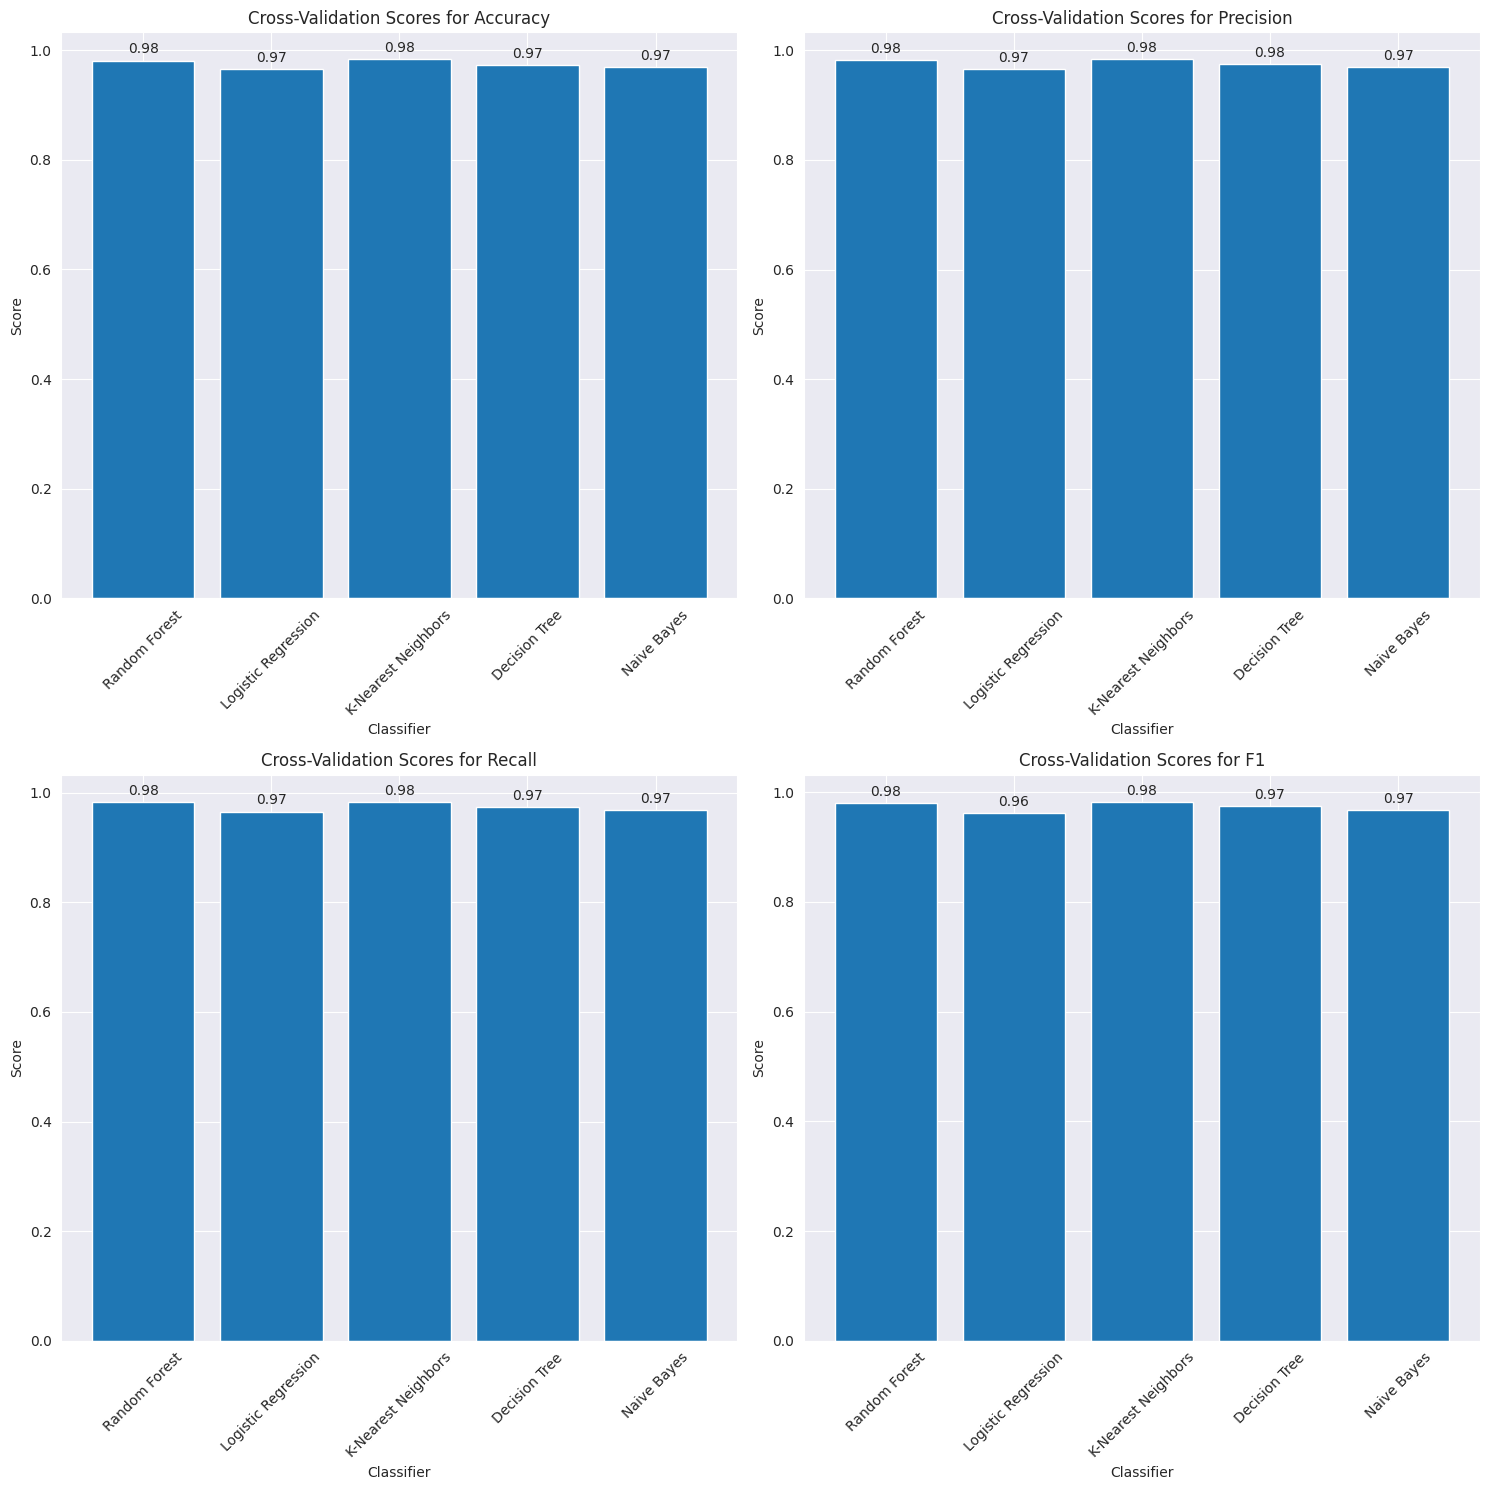

In [13]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df[df["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    bars = ax.bar(classifiers, means)
    ax.set_title(f'Cross-Validation Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(classifiers)
    ax.tick_params(axis='x', rotation=45)
    
    # Annotate each bar with its score
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics.pdf')
plt.show()
